# WEEK 004 - Regression Analysis Tutorial

## 1. 使用ライブラリ
まず、以下のライブラリを使うのでインポートをする
 + numpy
 + pandas
 + matplotlib.pyplot
 + sklearn.linear_model (線形回帰モデル)

matplotlibはjupyter上で描画したいので、以下のコードを書く. 
(week 002 matplotlib tutorial参照)
    
    %matplotlib inline

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR

## 2. 課題設定
お弁当屋さんの売り上げ実績データから売り上げ予測モデルを作成、分析する。
使用するモデルは線形回帰モデルを使用する。
今回はデータの準備、学習データとテストデータへの分割済みで、
 + data/train.csv
 + data/test.csv
として格納してある。

## 3. データを準備
pandasを使用して、データを読み込んでみる

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 4. データを確認してみる
データの最初のへんを眺めて、データをざっくり把握しよう<br>
csvをロードして作成した、pandasのDataFrameのheadメソッドを使用する

In [3]:
train.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [4]:
test.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-6-19,56,木,0,アジ唐揚げ南蛮ソース,430.0,NaN,NaN,NaN,晴れ,--,27.5
1,2014-6-20,57,金,0,炊き込みご飯,407.0,NaN,NaN,NaN,薄曇,--,26.5
2,2014-6-23,72,月,0,マーボ茄子,421.0,NaN,NaN,NaN,曇,--,26.9
3,2014-6-24,61,火,0,鶏のトマトシチュー,430.0,NaN,NaN,NaN,曇,0,23.7
4,2014-6-25,64,水,1,豚の冷しゃぶ,420.0,NaN,NaN,NaN,雨,0,25.2
5,2014-6-26,49,木,0,キスと野菜の天ぷら,414.0,NaN,NaN,NaN,曇,--,25.2
6,2014-6-27,74,金,0,牛丼,NaN,お楽しみメニュー,NaN,NaN,雨,0,25.4
7,2014-6-30,65,月,0,鶏の塩から揚げ,435.0,NaN,NaN,NaN,薄曇,--,25.5
8,2014-7-1,54,火,0,カレイ唐揚げ夏野菜あん,362.0,NaN,NaN,NaN,曇,--,28.3
9,2014-7-2,50,水,1,タンドリーチキン,363.0,NaN,NaN,NaN,快晴,--,28.8


なんか、時系列データっぽい。yは売り上げ数

## 4. 分析に入る前にデータ型の確認
 + 学習データ、テストデータが何行何列かを確認する (shapeメソッド, DataFrameが内包するnumpy配列数のチェック)
 + 学習データ、テストデータの各列毎の型を確認する (infoメソッド)

In [6]:
train.shape

(139, 12)

In [7]:
test.shape

(68, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 12 columns):
datetime         139 non-null object
y                139 non-null int64
week             139 non-null object
soldout          139 non-null int64
name             139 non-null object
kcal             105 non-null float64
remarks          10 non-null object
event            9 non-null object
payday           7 non-null float64
weather          139 non-null object
precipitation    139 non-null object
temperature      139 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 13.1+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 12 columns):
datetime         68 non-null object
y                68 non-null int64
week             68 non-null object
soldout          68 non-null int64
name             68 non-null object
kcal             61 non-null float64
remarks          11 non-null object
event            5 non-null object
payday           3 non-null float64
weather          68 non-null object
precipitation    68 non-null object
temperature      68 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 6.5+ KB


## 5. 欠損値に対処する
ざっくりみると、2種類の欠損値があることがわかる
 + NaN
 + --
 
 
  + 各列のNaNの有無を確認する (isnull, anyメソッド)
  + 各列のNaNの数を数える (countメソッド)
  + 各列のNaNを0に置換する 
  + 各列の--を0に置換する

In [12]:
train.isnull().any()

datetime         False
y                False
week             False
soldout          False
name             False
kcal              True
remarks           True
event             True
payday            True
weather          False
precipitation    False
temperature      False
dtype: bool

In [14]:
len(train) - train.count()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              34
remarks          129
event            130
payday           132
weather            0
precipitation      0
temperature        0
dtype: int64

In [17]:
train2 = train.fillna(0)
train2.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,0.0,0,0,0.0,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,0.0,0,0,0.0,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,0.0,0,0,0.0,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,0.0,0,0,0.0,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,0.0,0,0,0.0,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,0.0,0,0,0.0,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,0.0,0,0,0.0,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,0.0,0,0,0.0,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,0.0,0,0,0.0,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,0.0,0,0,0.0,快晴,--,12.1


In [18]:
train3 = train2.replace('--', 0)
train3.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,0.0,0,0,0.0,快晴,0,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,0.0,0,0,0.0,快晴,0,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,0.0,0,0,0.0,快晴,0,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,0.0,0,0,0.0,快晴,0,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,0.0,0,0,0.0,快晴,0,16.1
5,2013-11-25,135,月,1,鶏の唐揚,0.0,0,0,0.0,曇,0,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,0.0,0,0,0.0,快晴,0,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,0.0,0,0,0.0,晴れ,0,14.7
8,2013-11-28,151,木,0,ハンバーグ,0.0,0,0,0.0,薄曇,0,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,0.0,0,0,0.0,快晴,0,12.1


In [20]:
test.isnull().any()

datetime         False
y                False
week             False
soldout          False
name             False
kcal              True
remarks           True
event             True
payday            True
weather          False
precipitation    False
temperature      False
dtype: bool

In [21]:
len(test) - test.count()

datetime          0
y                 0
week              0
soldout           0
name              0
kcal              7
remarks          57
event            63
payday           65
weather           0
precipitation     0
temperature       0
dtype: int64

In [22]:
test2 = test.fillna(0)
test2.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-6-19,56,木,0,アジ唐揚げ南蛮ソース,430.0,0,0,0.0,晴れ,--,27.5
1,2014-6-20,57,金,0,炊き込みご飯,407.0,0,0,0.0,薄曇,--,26.5
2,2014-6-23,72,月,0,マーボ茄子,421.0,0,0,0.0,曇,--,26.9
3,2014-6-24,61,火,0,鶏のトマトシチュー,430.0,0,0,0.0,曇,0,23.7
4,2014-6-25,64,水,1,豚の冷しゃぶ,420.0,0,0,0.0,雨,0,25.2
5,2014-6-26,49,木,0,キスと野菜の天ぷら,414.0,0,0,0.0,曇,--,25.2
6,2014-6-27,74,金,0,牛丼,0.0,お楽しみメニュー,0,0.0,雨,0,25.4
7,2014-6-30,65,月,0,鶏の塩から揚げ,435.0,0,0,0.0,薄曇,--,25.5
8,2014-7-1,54,火,0,カレイ唐揚げ夏野菜あん,362.0,0,0,0.0,曇,--,28.3
9,2014-7-2,50,水,1,タンドリーチキン,363.0,0,0,0.0,快晴,--,28.8


In [23]:
test3 = test2.replace('--', 0)
test3.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-6-19,56,木,0,アジ唐揚げ南蛮ソース,430.0,0,0,0.0,晴れ,0,27.5
1,2014-6-20,57,金,0,炊き込みご飯,407.0,0,0,0.0,薄曇,0,26.5
2,2014-6-23,72,月,0,マーボ茄子,421.0,0,0,0.0,曇,0,26.9
3,2014-6-24,61,火,0,鶏のトマトシチュー,430.0,0,0,0.0,曇,0,23.7
4,2014-6-25,64,水,1,豚の冷しゃぶ,420.0,0,0,0.0,雨,0,25.2
5,2014-6-26,49,木,0,キスと野菜の天ぷら,414.0,0,0,0.0,曇,0,25.2
6,2014-6-27,74,金,0,牛丼,0.0,お楽しみメニュー,0,0.0,雨,0,25.4
7,2014-6-30,65,月,0,鶏の塩から揚げ,435.0,0,0,0.0,薄曇,0,25.5
8,2014-7-1,54,火,0,カレイ唐揚げ夏野菜あん,362.0,0,0,0.0,曇,0,28.3
9,2014-7-2,50,水,1,タンドリーチキン,363.0,0,0,0.0,快晴,0,28.8


## 6. 基本統計量を確認する
学習データの基本統計量を見てみる (describeメソッド)

In [25]:
train3.describe()

,y,soldout,kcal,payday,temperature
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,99.791367,0.503597,305.215827,0.050360,14.897842
std,30.531161,0.501795,176.555438,0.219477,6.800783
min,47.000000,0.000000,0.000000,0.000000,1.200000
25%,74.000000,0.000000,320.000000,0.000000,8.500000
50%,99.000000,1.000000,396.000000,0.000000,14.800000
75%,126.000000,1.000000,424.500000,0.000000,19.800000
max,171.000000,1.000000,462.000000,1.000000,30.600000


## 7. ざっくり傾向をみる
学習データに対して、以下を見てみる
 + 売り上げ(y)をプロットして、時系列毎の売り上げ変移をみる
 + 曜日毎の売り上げ分布をみる (箱ひげ図や散布図を使う)

In [26]:
train3.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,0.0,0,0,0.0,快晴,0,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,0.0,0,0,0.0,快晴,0,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,0.0,0,0,0.0,快晴,0,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,0.0,0,0,0.0,快晴,0,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,0.0,0,0,0.0,快晴,0,16.1
5,2013-11-25,135,月,1,鶏の唐揚,0.0,0,0,0.0,曇,0,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,0.0,0,0,0.0,快晴,0,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,0.0,0,0,0.0,晴れ,0,14.7
8,2013-11-28,151,木,0,ハンバーグ,0.0,0,0,0.0,薄曇,0,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,0.0,0,0,0.0,快晴,0,12.1


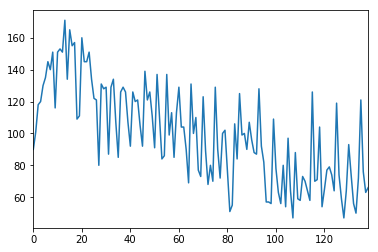

In [30]:
train３["y"].plot()

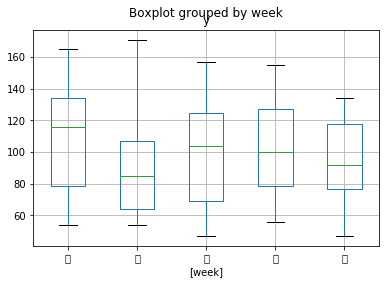

In [31]:
train3[["y", "week"]].boxplot(by="week")

## 8. 回帰分析をしてみる (線形回帰 & 単回帰)
#### 学習データから以下の目的変数を使うために、変数trainY, trainXに代入する
 + 目的変数: y (売り上げ)
 + 説明変数: temperature
 
 hint : reshape, BroadCasting(numpy)

In [35]:
trainX = train3["temperature"].values.reshape(-1, 1)
trainY = train3["y"].values.reshape(-1,1)
print(trainX)

[[ 19.8]
 [ 17. ]
 [ 15.5]
 [ 15.2]
 [ 16.1]
 [ 14.6]
 [ 17.9]
 [ 14.7]
 [ 17.7]
 [ 12.1]
 [ 13.8]
 [ 13.9]
 [ 13.5]
 [ 13.8]
 [ 14.9]
 [  9.1]
 [  7.1]
 [ 11. ]
 [ 12.3]
 [ 13.9]
 [ 11.3]
 [ 10.8]
 [  7.8]
 [  6.8]
 [  8.4]
 [ 11.5]
 [  8. ]
 [  7.3]
 [  7.3]
 [  9.8]
 [ 10.9]
 [  5.1]
 [  5.8]
 [  2.9]
 [  7. ]
 [  7.8]
 [  6.5]
 [ 10.4]
 [  7.4]
 [  8.5]
 [ 10.1]
 [  5.1]
 [ 12.6]
 [ 10.3]
 [ 15.3]
 [ 14.1]
 [ 15.9]
 [  3.8]
 [  3. ]
 [  4.2]
 [  5.5]
 [  7.8]
 [  6.3]
 [  6.4]
 [  1.2]
 [ 11.6]
 [  6.8]
 [  7.3]
 [  5.4]
 [  8.5]
 [  6.6]
 [ 10.5]
 [ 11.5]
 [  8.5]
 [ 17.7]
 [  7.8]
 [  8.3]
 [  6.1]
 [  6.7]
 [  7. ]
 [  7.6]
 [  8.7]
 [ 14.8]
 [ 15.2]
 [ 11.5]
 [ 14. ]
 [ 18.9]
 [ 12.6]
 [  7.5]
 [ 17.4]
 [ 18.9]
 [ 18.7]
 [ 12.4]
 [ 18.5]
 [ 17.5]
 [ 16.1]
 [ 18.2]
 [ 14.3]
 [ 17.8]
 [ 13.8]
 [ 20.1]
 [ 19. ]
 [ 21.3]
 [ 16.5]
 [ 16.4]
 [ 19.7]
 [ 21.5]
 [ 20.1]
 [ 11.4]
 [ 16.4]
 [ 18.8]
 [ 19.4]
 [ 19.9]
 [ 20.8]
 [ 22.7]
 [ 17.5]
 [ 24. ]
 [ 23.3]
 [ 18.9]
 [ 21. ]
 [ 23.4]
 

#### 線形回帰モデルインスタンスの生成とモデル生成
hint: fit関数

In [37]:
model = LR()
model.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### モデルの確認
hint: coef_ , intercept_ 

In [38]:
print(model.coef_, model.intercept_)

[[-2.30354199]] [ 134.10917091]


#### 値の予測
 + テストデータから値（売り上げ)の予測
 + テストデータに予測結果を"y-predict"というカラムを作成、csvに保存する (ファイル名"predict-1D.csv")

In [39]:
testX = test3["temperature"].values.reshape(-1,1)
p = model.predict(testX)

In [40]:
test3["y-predict"] = p
test3.to_csv("predict-1D.csv")

## 9. 回帰分析をしてみる (線形回帰 & 重回帰)
学習データから以下の目的変数を使うために、変数trainXに代入する<br>
テストデータからtestXに代入する
 + 目的変数: y (売り上げ)
 + 説明変数: temperature, week

weekは量的データでないため、ダミー変数化する。<br>
タミー変数とは、質的データを量的データに変換したもの。<br>
こんな感じ。 <br>
月曜 -> 1,0,0,0,0 <br>
水曜 -> 0,0,1,0,0<br>

hint: get_bummies

In [53]:
trainX = pd.get_dummies(train3[["week", "temperature"]])
testX = pd.get_dummies(test3[["week", "temperature"]])
trainX.head()

,temperature,week_月,week_木,week_水,week_火,week_金
0,19.8,1,0,0,0,0
1,17.0,0,0,0,1,0
2,15.5,0,0,1,0,0
3,15.2,0,1,0,0,0
4,16.1,0,0,0,0,1


#### 線形回帰モデルインスタンスの生成とモデル生成、モデルの確認

In [54]:
model6D = LR()
model6D.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print(model6D.coef_, model6D.intercept_)

[[ -2.38901719  12.29814621 -10.69640377  -1.12230344   4.03097305
   -4.51041206]] [ 135.64917021]


値の予測
 + テストデータから値（売り上げ)の予測
 + テストデータに予測結果を"y-predict"というカラムを作成、csvに保存する (ファイル名"predict-6D.csv")

In [56]:
p = model6D.predict(testX)
test3["y-predict"] = p
test3.to_csv("predict-6D.csv")

# モデルの評価は次回 !